In [144]:
# Вариант 27
import numpy as np
import math 
import matplotlib.pyplot as plt
import sympy as sm
import scipy

In [145]:
#ЗАДАНИЕ 8.1.27
#ищем аналитическое решение
x = sm.symbols('x')
P_x = 3.3-2.3*x+0.5*x**2+0.3*x**3+4.3*x**4-4.3*x**5
anres = sm.integrate(P_x, (x,1.0, 1.44))
print(anres)

-0.412468392652799


In [146]:
c = [3.3,-2.3,0.5,0.3,4.3,-4.3]#коэффициенты многочлена
#данные 
a = 1.0
b = 1.44
R = 0.0001

def P(x):#многочлен 
    p = 0;
    for i in range (len(c)):
        p+=c[i]*(x**i)
    return p

In [147]:
sm.diff(P_x,x,2)

-86.0*x**3 + 51.6*x**2 + 1.8*x + 1.0

In [148]:
sm.diff(P_x,x,4)

-516.0*x + 103.2

In [149]:
#производные
def dP2(x):
    return -86.0*x**3 + 51.6*x**2 + 1.8*x + 1.0

def dP4(x):
    return -516.0*x + 103.2

In [150]:
value_x=np.arange(1.0,1.44,0.0001)

def M(k): #для оценки 
    if (k==2):
        return max(abs(dP2(value_x)))
    if (k==4):
        return max(abs(dP4(value_x)))
#функция для формулы трапеций
def tr(h,n):
    res = (P(a)+P(b))/2
    for i in range(1,n):
        res+=P(a+i*h)
    return res*h

#функция для формулы Симпсона
def symps(h,n):
    res = P(a)+P(b)
    for i in range(n):
        res += 4*P((a+h*i+a+(i+1)*h)/2) 
    for i in range(1,n):
        res += 2*P(a+i*h)
    return res*h/6   

In [151]:
#элементарная формула трапеций
h=b-a
I1=(P(b)+P(a))*h/2
print("По элементарной формуле трапеций: ",I1)
print("Погрешность: ",abs(I1-anres))

По элементарной формуле трапеций:  -0.9712248674303995
Погрешность:  0.558756474777600


In [152]:
#элементарная формула Симпсона
h=b-a
I2=(P(a)+4*((a+b)/2)+P(b))*h/6
print("По элементарной формуле Симпсона: ",I2)
print("Погрешность: ",abs(I2-anres))

По элементарной формуле Симпсона:  0.0341250441898668
Погрешность:  0.446593436842666


In [153]:
#оценим число шагов
h2=math.sqrt((12*R)/((b-a)*M(2))) #R=M2*(b-a)*h^2/12 - погрешность 
n2=int((b-a)/h2+1)
print("Число шагов для составной формулы трапеции: ", n2)

h2=(b-a)/n2
print("Шаг для нее: ",h2)
#посчитаем интеграл по формуле трапеций
I3=tr(h2,n2)
print("По составной формуле трапеций: ",I3)
print("Погрешность: ",abs(I3-anres))

Число шагов для составной формулы трапеции:  102
Шаг для нее:  0.004313725490196078
По составной формуле трапеций:  -0.4125232571945171
Погрешность:  5.48645417178806e-5


In [154]:
#оценим число шагов
h3 = ((2880*R)/(M(4)*(b-a)))**(0.25)
n3=int((b-a)/h3+1)
print("Число шагов для составной формулы Симпсона: ", n3)

h3=(b-a)/n3
print("Шаг для нее: ",h3)
#посчитаем интеграо по формуле Симпсона
I4=symps(h3,n3)
print("По составной формуле Симпсона: ",I4)
print("Погрешность: ",abs(I4-anres))

Число шагов для составной формулы Симпсона:  3
Шаг для нее:  0.14666666666666664
По составной формуле Симпсона:  -0.41250560060333724
Погрешность:  3.72079505380207e-5


In [155]:
#Величина погрешностей для составных формул меньше 0.0001
#Интегрирование по формуле Симпсона происходит гораздо быстрее (3 шага вместо 102)

In [156]:
#ЗАДАНИЕ 8.4.9

In [157]:
#заданная подинтегральная функция
def f(x,t):
    return np.cos(x+5*t)*np.sin(2*x-t)
#данные 
a = 0
b = 3
x1 = -2
x2 = -1

In [162]:
#ищем заданную функцию F(x) на интервале [x1,x2] с помощию формулы трапеций
def F(x, n):
    h = (b-a)/n
    res = (f(x, a)+f(x, b))/2
    for i in range(1,n):
        res += f(x, a+i*h)
    return res*h

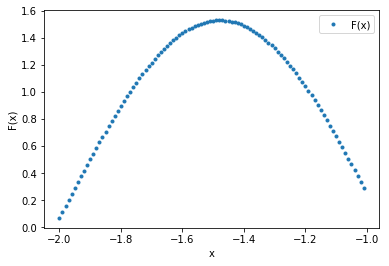

In [163]:
int_lst = []
for x in np.arange(-2.0, -1.0, 10**(-2)):
    n = 1
    #используем правило Рунге для определения шага, заданная точность 10**(-8)
    while (F(x, 2*n)-F(x, n)/3)>10**(-8):
        n += 1
    int_lst.append(F(x, n))  
plt.plot(np.arange(-2.0, -1.0, 10**(-2)), np.array(int_lst), '.' , label = u'F(x)')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.show()

In [164]:
#ЗАДАНИЕ 8.7.10

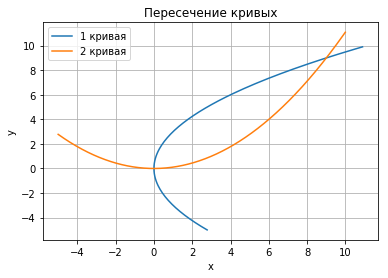

In [165]:
plt.grid(True)
plt.xlabel(u'x')
plt.ylabel(u'y')
plt.title(u'Пересечение кривых')

y = np.arange (-5,10,0.1) 
x = y**2/9 #выразили x через y из первого уравнения
plt.plot(x,y,label = u'1 кривая')

x = np.arange (-5,10,0.01)
y = x**2/9 #выразили y через x из второго уравнения
plt.plot(x,y,label = u'2 кривая')

plt.legend()
plt.show()

In [166]:
f1 = lambda x: 3*np.sqrt(x)
f2 = lambda x: x**2/9

In [167]:
#По графику получим 2 точки: (0,0), (9,9), зададим данные 
a = 0.0
b = 9.0

In [168]:
#функция для формулы Симпсона
def symps(P,n):
    h=(b-a)/n
    res = P(a)+P(b)
    for i in range(n):
        res += 4*P((a+h*i+a+(i+1)*h)/2) 
    for i in range(1,n):
        res += 2*P(a+i*h)
    return res*h/6   

In [169]:
#Искомая площадь - разность площадей "треугольников" (из площади под оранжевым графиком вычтем площадь под синим графиком)

In [170]:
n = 1
#используем правило Рунге для определения шага, заданная точность 10**(-8)
while (abs(symps(f1, 2*n)-symps(f1, n))/15)>10**(-8):
    n = 2*n
res1 = symps(f1,n)

In [171]:
m = 1
#используем правило Рунге для определения шага, заданная точность 10**(-8)
while (abs(symps(f2, 2*m)-symps(f2, m))/15)>10**(-8):
    m += 1
res2 = symps(f2,m)

In [172]:
res1-res2

26.99999986142283

In [173]:
#ЗАДАНИЕ 8.6.27

In [176]:
#используем аналитическое решение из задачи 1
anres=-0.412468392652799
#данные 
c = [3.3,-2.3,0.5,0.3,4.3,-4.3]#коэффициенты многочлена
a = 1.0
b = 1.44

def P(x):#многочлен 
    p = 0;
    for i in range (len(c)):
        p+=c[i]*(x**i)
    return p

In [180]:
#функция для формулы Гаусса
def gauss1(a,b,f):
    return((b-a)/2)*2*f((a+b)/2)

def gauss2(a,b,f):
    t0=-0.577350269189626
    A0=1.0
    t1=0.577350269189626
    A1=1.0
    return ((b-a)/2)*(A0*f((a+b)/2+(b-a)*t0/2)+A1*f((a+b)/2+(b-a)*t1/2))

def gauss3(a,b,f):
    t0=-0.77459666929954
    A0=0.55555555555556
    t1=0.0
    A1=0.88888888888888
    t2=0.77459666929954
    A2=0.55555555555556
    return ((b-a)/2)*(A0*f((a+b)/2+(b-a)*t0/2)+A1*f((a+b)/2+(b-a)*t1/2)+A2*f((a+b)/2+(b-a)*t2/2))

def gauss4(a,b,f):
    t0=-0.861136311594052
    A0=0.347854845137454
    t1=-0.339981043584856
    A1=0.652145154862546
    t2=0.339981043584856
    A2=0.652145154862546
    t3=0.861136311594052
    A3=0.347854845137454
    return ((b-a)/2)*(A0*f((a+b)/2+(b-a)*t0/2)+A1*f((a+b)/2+(b-a)*t1/2)+A2*f((a+b)/2+(b-a)*t2/2)+A3*f((a+b)/2+(b-a)*t3/2))

In [190]:
#ищем интеграл с помощью формул Гаусса
I1=gauss1(a,b,P)
I2=gauss2(a,b,P)
I3=gauss3(a,b,P)
I4=gauss4(a,b,P)
print(I1,I2,I3,I4)
#ищем погрешность
er=np.array([abs(I1-anres),abs(I2-anres),abs(I3-anres),abs(I4-anres)])

-0.13761092125440014 -0.4104591633237332 -0.4124683926946812 -0.4124683926527993


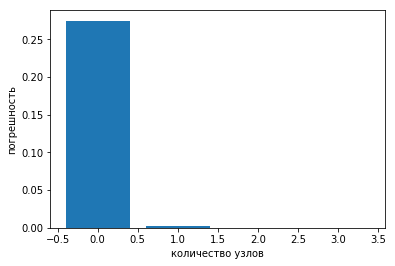

In [191]:
#построим график зависимости погрешности от числа узлов
plt.bar(range(0, 4), er)
plt.xlabel('количество узлов');
plt.ylabel('погрешность');

In [192]:
#квадратурные формулы Гаусса с N+1 (N=0,1,2,3) узлом точны для многочленов 1, t,…,tm, где m=2N+1, 
#так как для многочлена степени m=5, квадратурная формула Гаусса с N+1=2+1=3 узлами и больше точна

In [193]:
#ЗАДАНИЕ 8.9.27

In [196]:
#данные 
l=0.1 
a=0 
b=1 
#формула Гаусса с 3 узлами
t0=-0.77459666929954
A0=0.55555555555556
t1=0.0
A1=0.88888888888888
t2=0.77459666929954
A2=0.55555555555556
gauss3 = lambda x: l*((b-a)/2)*(A0*k(x,(a+b)/2+(b-a)*t0/2) + A1*k(x, (a+b)/2+(b-a)*t1/2) + A2*k(x, (a+b)/2+(b-a)*t2/2))

k = lambda x,t: 1/(10-x*t)
f = lambda x: 1+x**2

h=(b-a)/10

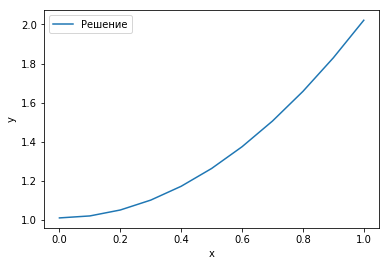

In [199]:
#выразили из уравнения (с использованием формулы Гаусса)
y = lambda x: f(x)/(1 - gauss3(x))
#построим график полученного решения с заданным шагом
x_range = np.arange(a, b+h, h)
y_range = y(x_range)
plt.plot(x_range, y_range, label = u'Решение')
plt.xlabel(u'x')
plt.ylabel(u'y')
plt.legend()
plt.show()

In [200]:
#решение
y_range

array([1.01010101, 1.02025389, 1.05061261, 1.10118036, 1.17196044,
       1.26295624, 1.37417123, 1.50560901, 1.65727326, 1.82916778,
       2.02129648])